In [10]:
library(DAAG)
library(magrittr)
library(tidyverse)
library(rpart)
library(rpart.plot)

n= 47 

node), split, n, deviance, yval
      * denotes terminal node

1) root 47 6880928.0  905.0851  
  2) Po1< 7.65 23  779243.5  669.6087  
    4) Pop< 22.5 12  243811.0  550.5000 *
    5) Pop>=22.5 11  179470.7  799.5455 *
  3) Po1>=7.65 24 3604162.0 1130.7500  
    6) NW< 7.65 10  557574.9  886.9000 *
    7) NW>=7.65 14 2027225.0 1304.9290 *

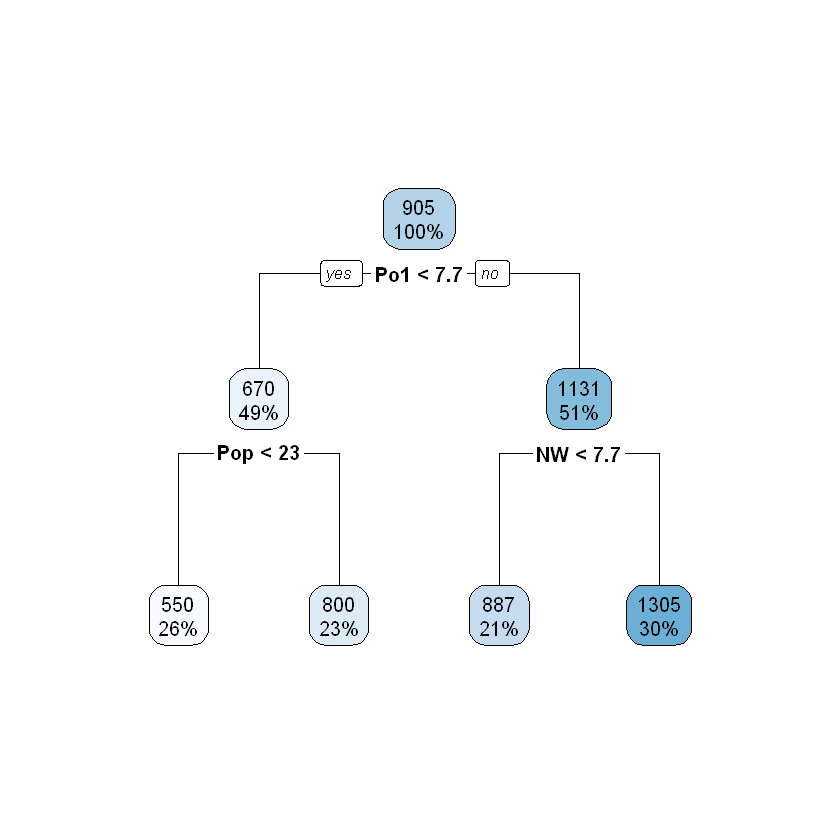

In [11]:

data = read.table("C:/Users/ateje/Downloads/hw5_solutions-SP22/uscrime.txt", stringsAsFactors = FALSE, header = TRUE)

#build tree regression on entire dataset
reg.T = rpart(Crime ~ ., data = data, method = "anova", cp = 0.008)
reg.T
rpart.plot(reg.T)

In [12]:
summary(reg.T)

Call:
rpart(formula = Crime ~ ., data = data, method = "anova", cp = 0.008)
  n= 47 

          CP nsplit rel error   xerror      xstd
1 0.36296293      0 1.0000000 1.050226 0.2660073
2 0.14814320      1 0.6370371 1.149382 0.2611783
3 0.05173165      2 0.4888939 1.122337 0.2520715
4 0.00800000      3 0.4371622 1.094707 0.2535185

Variable importance
   Po1    Po2 Wealth   Ineq   Prob      M     NW    Pop   Time     Ed     LF 
    17     17     11     11     10     10      9      5      4      4      1 
    So 
     1 

Node number 1: 47 observations,    complexity param=0.3629629
  mean=905.0851, MSE=146402.7 
  left son=2 (23 obs) right son=3 (24 obs)
  Primary splits:
      Po1    < 7.65      to the left,  improve=0.3629629, (0 missing)
      Po2    < 7.2       to the left,  improve=0.3629629, (0 missing)
      Prob   < 0.0418485 to the right, improve=0.3217700, (0 missing)
      NW     < 7.65      to the left,  improve=0.2356621, (0 missing)
      Wealth < 6240      to the left,  im

In [13]:
reg.T$variable.importance  

Po1       Po2    Wealth      Ineq      Prob         M        NW       Pop 
2497521.7 2497521.7 1628818.5 1602212.0 1520230.6 1388627.8 1245883.8  661770.6 
     Time        Ed        LF        So 
 601906.0  569545.9  203872.5  161800.8

In [21]:
pred.tree = predict(reg.T, data = data[,1:15])

#calculate mean squared error 
SSE = sum((pred.tree - data[,16])^2)
TSS = sum((data[,16] - mean(data[,16]))^2)
R2 = 1 - SSE/TSS

R2

[1] 0.5628378

R2 = 0.5628... Does this have something to do with me setting cp = 0.008? 

A prediction of 1388 with an adjusted R-squared of 0.60 is a good prediction that stacks well against last week's cross validation. Overall we 
see that PCA can generate comparable results when observing less predictors while not risking losing valuable information when using 
cross validation couples with methods like RFE. 